In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import itertools
import csv

In [2]:
df = pd.read_csv("appendicitis20noise.csv", sep=',')
df.columns.values
df.shape

(106, 9)

In [3]:
data = df.iloc[:,1:8]
labels = df.iloc[:,8].astype(str)

In [4]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Euclidean metric and k tuning

              precision    recall  f1-score   support

           1       0.78      0.84      0.81        38
           0       0.50      0.40      0.44        15

   micro avg       0.72      0.72      0.72        53
   macro avg       0.64      0.62      0.63        53
weighted avg       0.70      0.72      0.71        53

accuracy:  0.7169811320754716


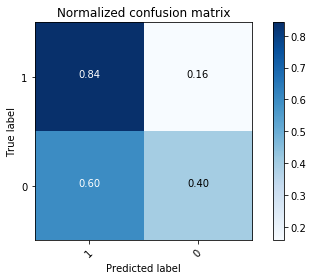

              precision    recall  f1-score   support

           1       0.93      0.83      0.88        47
           0       0.27      0.50      0.35         6

   micro avg       0.79      0.79      0.79        53
   macro avg       0.60      0.66      0.61        53
weighted avg       0.85      0.79      0.82        53

accuracy:  0.7924528301886793


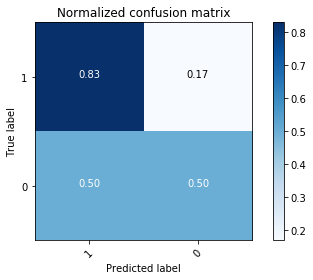

              precision    recall  f1-score   support

           1       0.94      0.79      0.86        42
           0       0.50      0.82      0.62        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.72      0.80      0.74        53
weighted avg       0.85      0.79      0.81        53

accuracy:  0.7924528301886793


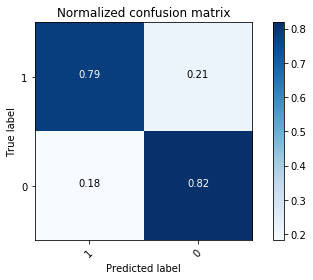

              precision    recall  f1-score   support

           1       0.90      0.86      0.88        43
           0       0.50      0.60      0.55        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.70      0.73      0.71        53
weighted avg       0.83      0.81      0.82        53

accuracy:  0.8113207547169812


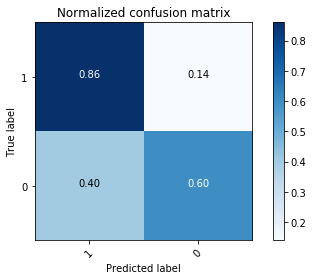

              precision    recall  f1-score   support

           1       0.84      0.90      0.87        41
           0       0.56      0.42      0.48        12

   micro avg       0.79      0.79      0.79        53
   macro avg       0.70      0.66      0.67        53
weighted avg       0.78      0.79      0.78        53

accuracy:  0.7924528301886793


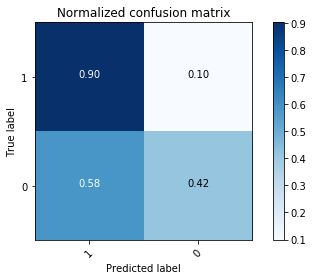

              precision    recall  f1-score   support

           1       0.89      0.91      0.90        44
           0       0.50      0.44      0.47         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.69      0.68      0.68        53
weighted avg       0.82      0.83      0.83        53

accuracy:  0.8301886792452831


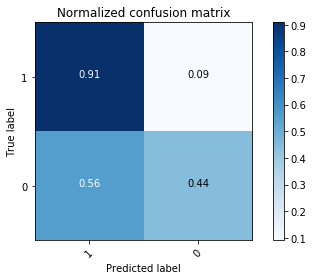

              precision    recall  f1-score   support

           1       0.86      0.84      0.85        44
           0       0.30      0.33      0.32         9

   micro avg       0.75      0.75      0.75        53
   macro avg       0.58      0.59      0.58        53
weighted avg       0.77      0.75      0.76        53

accuracy:  0.7547169811320755


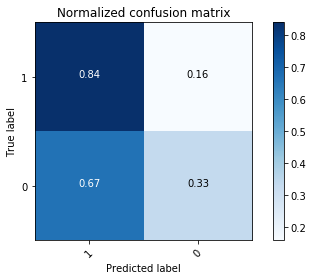

              precision    recall  f1-score   support

           1       0.90      0.90      0.90        41
           0       0.67      0.67      0.67        12

   micro avg       0.85      0.85      0.85        53
   macro avg       0.78      0.78      0.78        53
weighted avg       0.85      0.85      0.85        53

accuracy:  0.8490566037735849


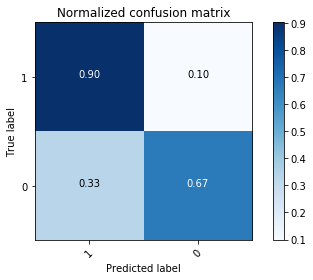

              precision    recall  f1-score   support

           1       0.95      0.91      0.93        43
           0       0.67      0.80      0.73        10

   micro avg       0.89      0.89      0.89        53
   macro avg       0.81      0.85      0.83        53
weighted avg       0.90      0.89      0.89        53

accuracy:  0.8867924528301887


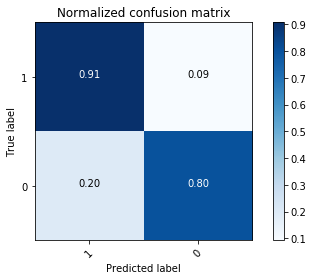

              precision    recall  f1-score   support

           1       0.91      0.93      0.92        42
           0       0.70      0.64      0.67        11

   micro avg       0.87      0.87      0.87        53
   macro avg       0.80      0.78      0.79        53
weighted avg       0.86      0.87      0.87        53

accuracy:  0.8679245283018868


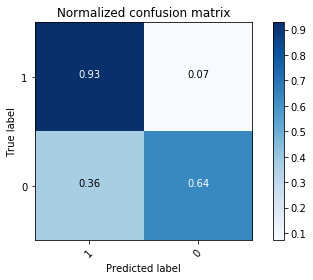

In [6]:
acc =[]
acc.append("Euclidean 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.85      0.97      0.91        40
           0       0.86      0.46      0.60        13

   micro avg       0.85      0.85      0.85        53
   macro avg       0.85      0.72      0.75        53
weighted avg       0.85      0.85      0.83        53

accuracy:  0.8490566037735849


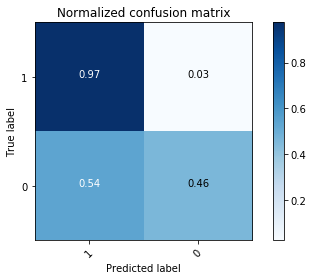

              precision    recall  f1-score   support

           1       0.91      0.96      0.93        45
           0       0.67      0.50      0.57         8

   micro avg       0.89      0.89      0.89        53
   macro avg       0.79      0.73      0.75        53
weighted avg       0.88      0.89      0.88        53

accuracy:  0.8867924528301887


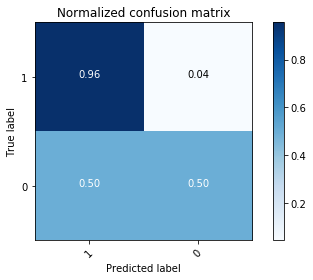

              precision    recall  f1-score   support

           1       0.87      0.98      0.92        42
           0       0.83      0.45      0.59        11

   micro avg       0.87      0.87      0.87        53
   macro avg       0.85      0.72      0.75        53
weighted avg       0.86      0.87      0.85        53

accuracy:  0.8679245283018868


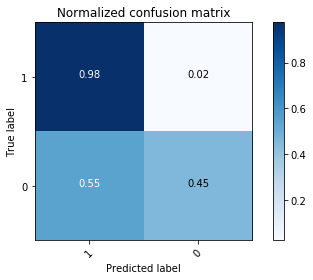

              precision    recall  f1-score   support

           1       0.89      0.98      0.93        43
           0       0.83      0.50      0.62        10

   micro avg       0.89      0.89      0.89        53
   macro avg       0.86      0.74      0.78        53
weighted avg       0.88      0.89      0.88        53

accuracy:  0.8867924528301887


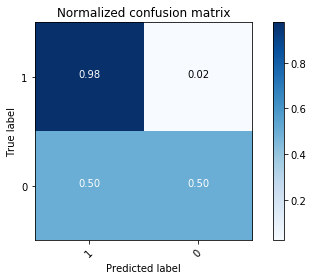

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        43
           0       1.00      0.50      0.67        10

   micro avg       0.91      0.91      0.91        53
   macro avg       0.95      0.75      0.81        53
weighted avg       0.92      0.91      0.89        53

accuracy:  0.9056603773584906


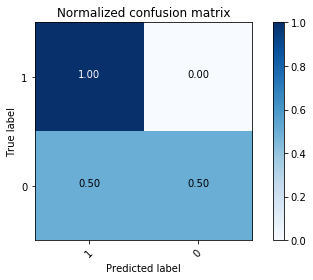

              precision    recall  f1-score   support

           1       0.87      0.95      0.91        42
           0       0.71      0.45      0.56        11

   micro avg       0.85      0.85      0.85        53
   macro avg       0.79      0.70      0.73        53
weighted avg       0.84      0.85      0.84        53

accuracy:  0.8490566037735849


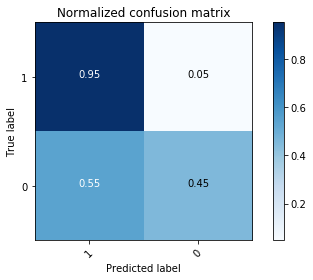

              precision    recall  f1-score   support

           1       0.88      0.95      0.91        44
           0       0.60      0.33      0.43         9

   micro avg       0.85      0.85      0.85        53
   macro avg       0.74      0.64      0.67        53
weighted avg       0.83      0.85      0.83        53

accuracy:  0.8490566037735849


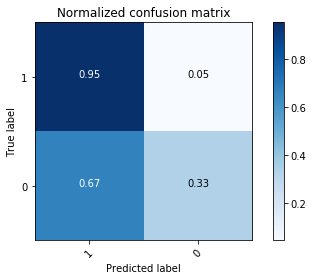

              precision    recall  f1-score   support

           1       0.87      0.98      0.92        41
           0       0.86      0.50      0.63        12

   micro avg       0.87      0.87      0.87        53
   macro avg       0.86      0.74      0.78        53
weighted avg       0.87      0.87      0.85        53

accuracy:  0.8679245283018868


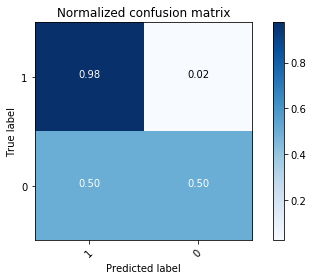

              precision    recall  f1-score   support

           1       0.89      0.93      0.91        45
           0       0.50      0.38      0.43         8

   micro avg       0.85      0.85      0.85        53
   macro avg       0.70      0.65      0.67        53
weighted avg       0.83      0.85      0.84        53

accuracy:  0.8490566037735849


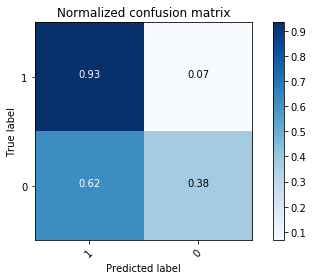

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        40
           0       1.00      0.46      0.63        13

   micro avg       0.87      0.87      0.87        53
   macro avg       0.93      0.73      0.78        53
weighted avg       0.89      0.87      0.85        53

accuracy:  0.8679245283018868


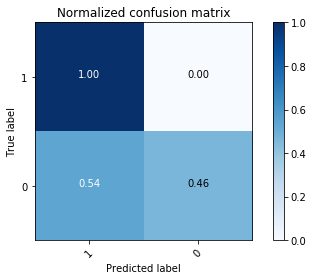

In [7]:
acc.append("Euclidean 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.74      1.00      0.85        39
           0       0.00      0.00      0.00        14

   micro avg       0.74      0.74      0.74        53
   macro avg       0.37      0.50      0.42        53
weighted avg       0.54      0.74      0.62        53

accuracy:  0.7358490566037735


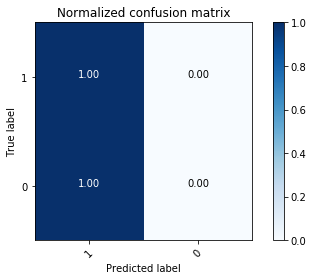

              precision    recall  f1-score   support

           1       0.91      0.93      0.92        46
           0       0.50      0.43      0.46         7

   micro avg       0.87      0.87      0.87        53
   macro avg       0.71      0.68      0.69        53
weighted avg       0.86      0.87      0.86        53

accuracy:  0.8679245283018868


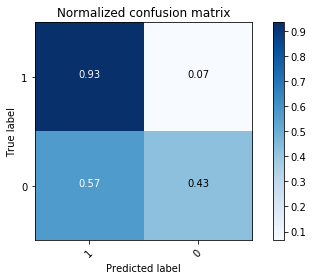

              precision    recall  f1-score   support

           1       0.82      0.98      0.89        42
           0       0.67      0.18      0.29        11

   micro avg       0.81      0.81      0.81        53
   macro avg       0.74      0.58      0.59        53
weighted avg       0.79      0.81      0.77        53

accuracy:  0.8113207547169812


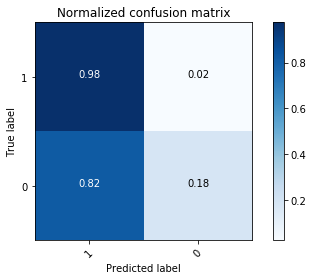

              precision    recall  f1-score   support

           1       0.80      0.95      0.87        43
           0       0.00      0.00      0.00        10

   micro avg       0.77      0.77      0.77        53
   macro avg       0.40      0.48      0.44        53
weighted avg       0.65      0.77      0.71        53

accuracy:  0.7735849056603774


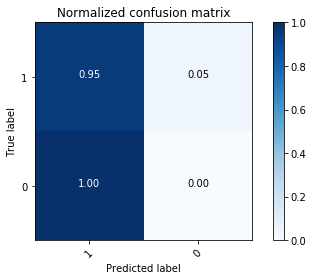

              precision    recall  f1-score   support

           1       0.90      0.98      0.93        44
           0       0.80      0.44      0.57         9

   micro avg       0.89      0.89      0.89        53
   macro avg       0.85      0.71      0.75        53
weighted avg       0.88      0.89      0.87        53

accuracy:  0.8867924528301887


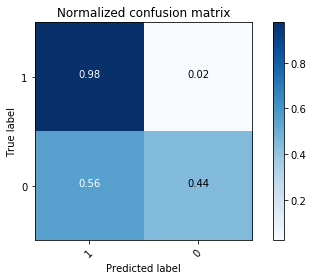

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


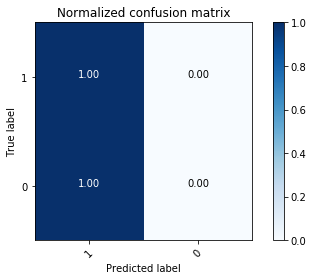

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.74      1.00      0.85        39
           0       0.00      0.00      0.00        14

   micro avg       0.74      0.74      0.74        53
   macro avg       0.37      0.50      0.42        53
weighted avg       0.54      0.74      0.62        53

accuracy:  0.7358490566037735


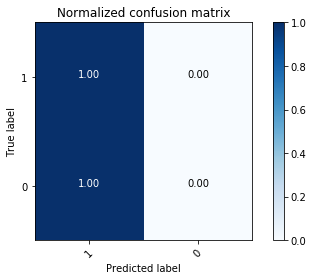

              precision    recall  f1-score   support

           1       0.92      0.96      0.94        46
           0       0.60      0.43      0.50         7

   micro avg       0.89      0.89      0.89        53
   macro avg       0.76      0.69      0.72        53
weighted avg       0.87      0.89      0.88        53

accuracy:  0.8867924528301887


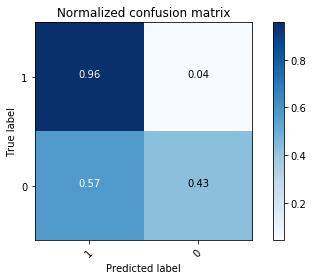

              precision    recall  f1-score   support

           1       0.86      1.00      0.92        43
           0       1.00      0.30      0.46        10

   micro avg       0.87      0.87      0.87        53
   macro avg       0.93      0.65      0.69        53
weighted avg       0.89      0.87      0.84        53

accuracy:  0.8679245283018868


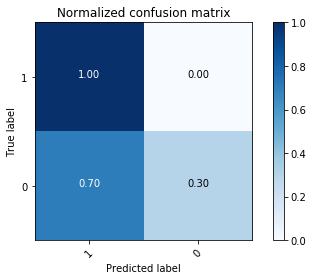

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


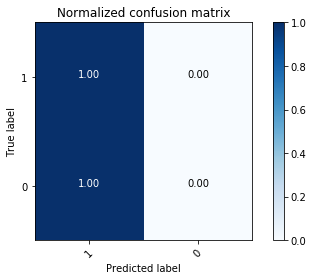

In [8]:
acc.append("Euclidean 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


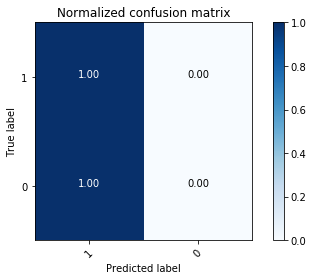

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


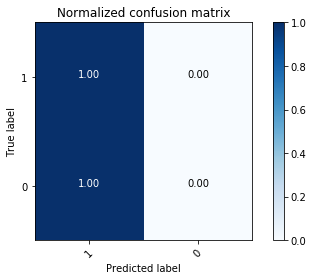

              precision    recall  f1-score   support

           1       0.90      0.98      0.94        45
           0       0.75      0.38      0.50         8

   micro avg       0.89      0.89      0.89        53
   macro avg       0.82      0.68      0.72        53
weighted avg       0.88      0.89      0.87        53

accuracy:  0.8867924528301887


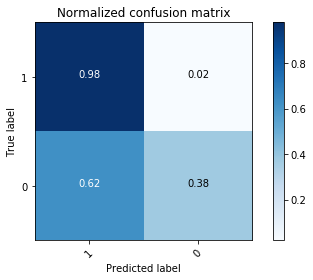

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


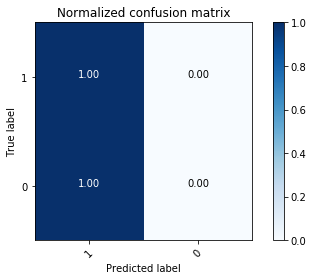

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        46
           0       1.00      0.57      0.73         7

   micro avg       0.94      0.94      0.94        53
   macro avg       0.97      0.79      0.85        53
weighted avg       0.95      0.94      0.94        53

accuracy:  0.9433962264150944


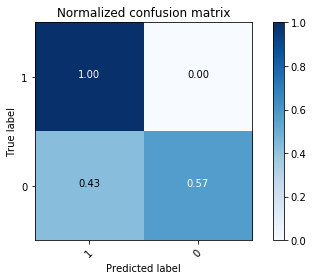

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.74      1.00      0.85        39
           0       0.00      0.00      0.00        14

   micro avg       0.74      0.74      0.74        53
   macro avg       0.37      0.50      0.42        53
weighted avg       0.54      0.74      0.62        53

accuracy:  0.7358490566037735


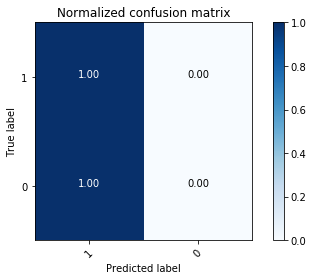

              precision    recall  f1-score   support

           1       0.86      1.00      0.93        44
           0       1.00      0.22      0.36         9

   micro avg       0.87      0.87      0.87        53
   macro avg       0.93      0.61      0.64        53
weighted avg       0.89      0.87      0.83        53

accuracy:  0.8679245283018868


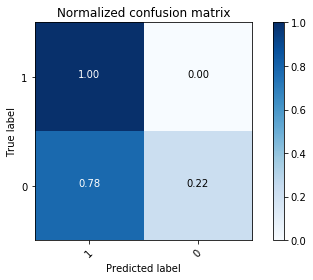

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


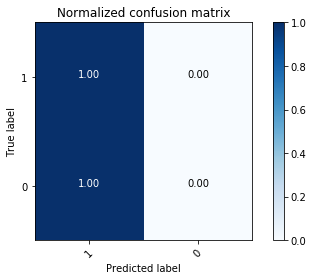

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


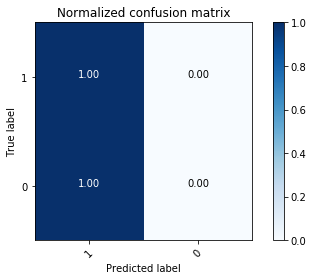

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


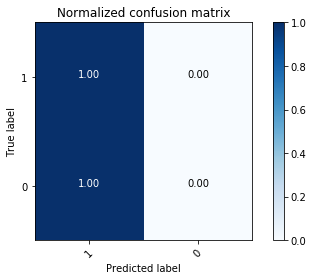

In [9]:
acc.append("Euclidean 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


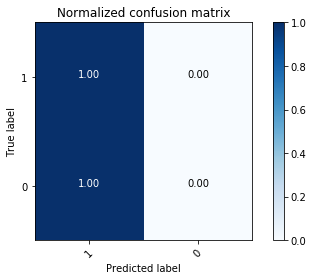

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


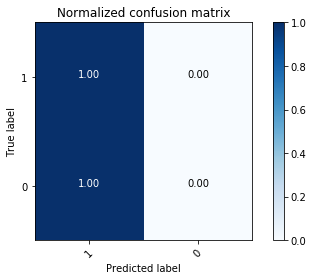

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


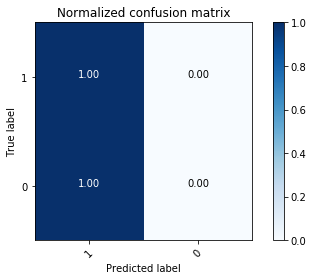

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


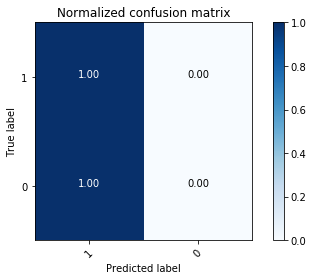

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


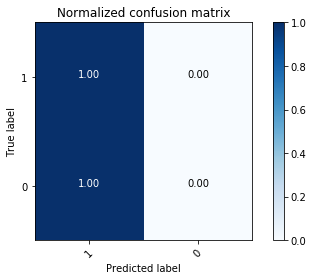

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


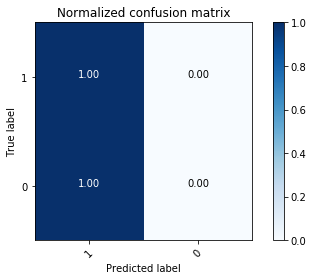

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.72      1.00      0.84        38
           0       0.00      0.00      0.00        15

   micro avg       0.72      0.72      0.72        53
   macro avg       0.36      0.50      0.42        53
weighted avg       0.51      0.72      0.60        53

accuracy:  0.7169811320754716


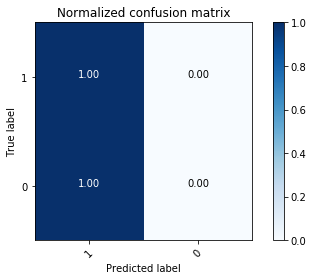

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.89      1.00      0.94        47
           0       0.00      0.00      0.00         6

   micro avg       0.89      0.89      0.89        53
   macro avg       0.44      0.50      0.47        53
weighted avg       0.79      0.89      0.83        53

accuracy:  0.8867924528301887


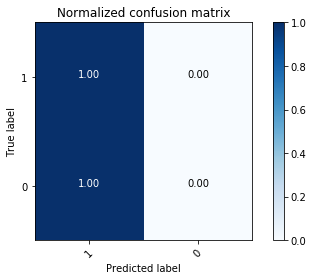

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


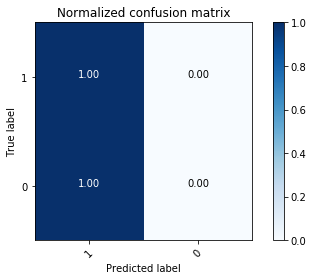

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


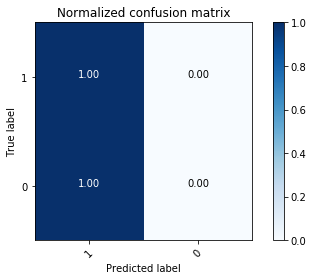

In [10]:
acc.append("Euclidean 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


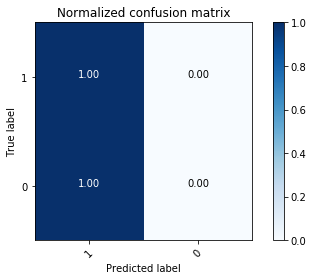

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


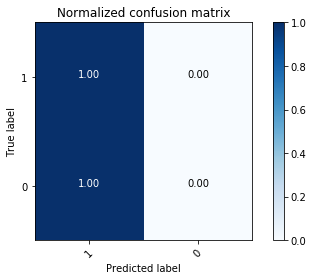

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


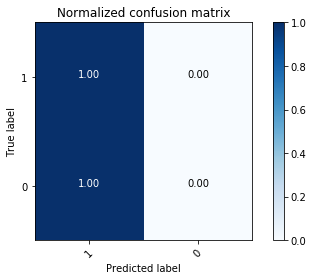

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


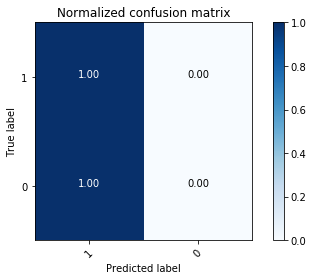

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


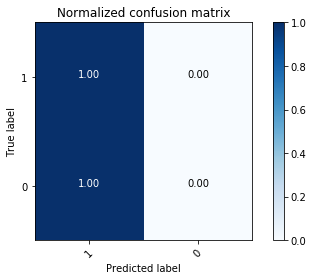

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


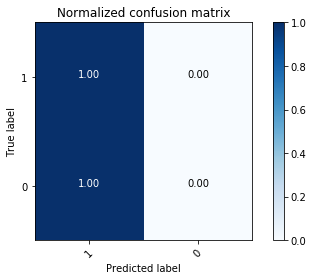

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


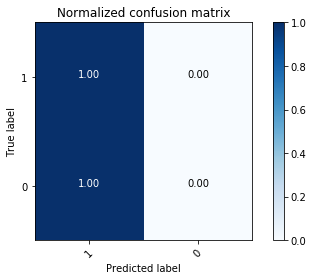

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


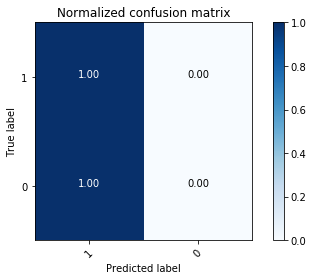

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


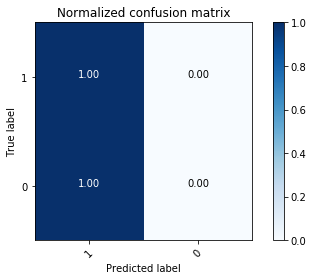

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


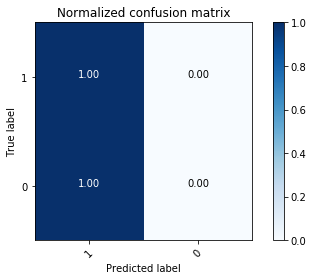

In [11]:
acc.append("Euclidean 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.72      1.00      0.84        38
           0       0.00      0.00      0.00        15

   micro avg       0.72      0.72      0.72        53
   macro avg       0.36      0.50      0.42        53
weighted avg       0.51      0.72      0.60        53

accuracy:  0.7169811320754716


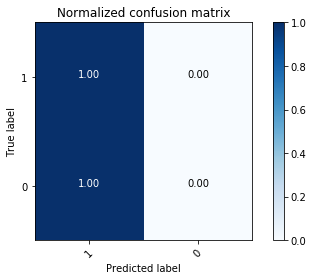

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.89      1.00      0.94        47
           0       0.00      0.00      0.00         6

   micro avg       0.89      0.89      0.89        53
   macro avg       0.44      0.50      0.47        53
weighted avg       0.79      0.89      0.83        53

accuracy:  0.8867924528301887


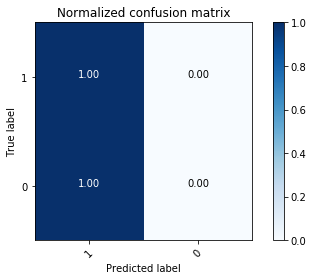

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.85      1.00      0.92        45
           0       0.00      0.00      0.00         8

   micro avg       0.85      0.85      0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53

accuracy:  0.8490566037735849


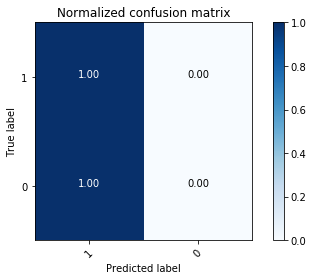

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


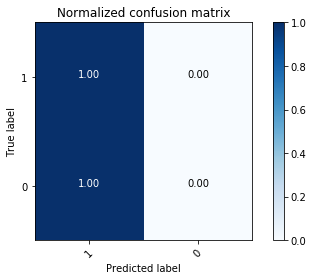

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


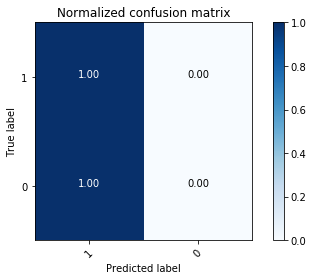

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


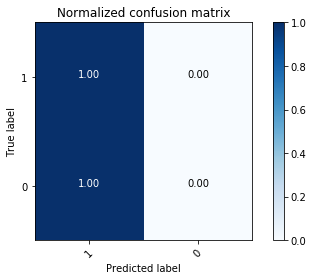

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.87      1.00      0.93        46
           0       0.00      0.00      0.00         7

   micro avg       0.87      0.87      0.87        53
   macro avg       0.43      0.50      0.46        53
weighted avg       0.75      0.87      0.81        53

accuracy:  0.8679245283018868


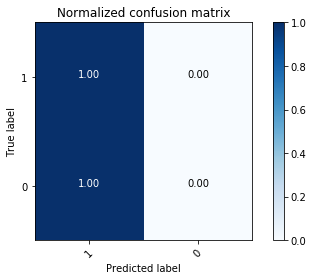

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.74      1.00      0.85        39
           0       0.00      0.00      0.00        14

   micro avg       0.74      0.74      0.74        53
   macro avg       0.37      0.50      0.42        53
weighted avg       0.54      0.74      0.62        53

accuracy:  0.7358490566037735


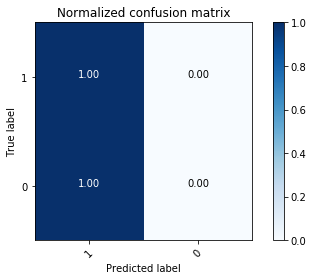

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.91      1.00      0.95        48
           0       0.00      0.00      0.00         5

   micro avg       0.91      0.91      0.91        53
   macro avg       0.45      0.50      0.48        53
weighted avg       0.82      0.91      0.86        53

accuracy:  0.9056603773584906


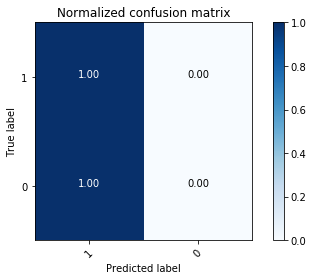

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.70      1.00      0.82        37
           0       0.00      0.00      0.00        16

   micro avg       0.70      0.70      0.70        53
   macro avg       0.35      0.50      0.41        53
weighted avg       0.49      0.70      0.57        53

accuracy:  0.6981132075471698


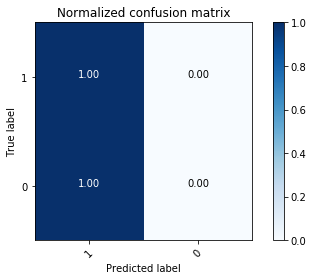

In [12]:
acc.append("Euclidean 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Minkowski metric and k tunning

              precision    recall  f1-score   support

           1       0.93      0.88      0.90        43
           0       0.58      0.70      0.64        10

   micro avg       0.85      0.85      0.85        53
   macro avg       0.76      0.79      0.77        53
weighted avg       0.86      0.85      0.85        53

accuracy:  0.8490566037735849


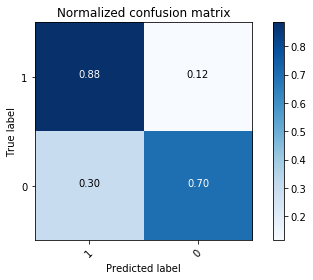

              precision    recall  f1-score   support

           1       0.87      0.95      0.91        42
           0       0.71      0.45      0.56        11

   micro avg       0.85      0.85      0.85        53
   macro avg       0.79      0.70      0.73        53
weighted avg       0.84      0.85      0.84        53

accuracy:  0.8490566037735849


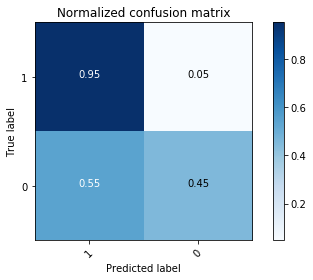

              precision    recall  f1-score   support

           1       0.95      0.80      0.87        46
           0       0.36      0.71      0.48         7

   micro avg       0.79      0.79      0.79        53
   macro avg       0.65      0.76      0.67        53
weighted avg       0.87      0.79      0.82        53

accuracy:  0.7924528301886793


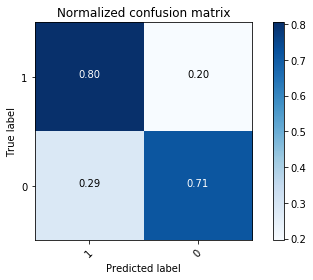

              precision    recall  f1-score   support

           1       0.78      0.90      0.83        39
           0       0.50      0.29      0.36        14

   micro avg       0.74      0.74      0.74        53
   macro avg       0.64      0.59      0.60        53
weighted avg       0.70      0.74      0.71        53

accuracy:  0.7358490566037735


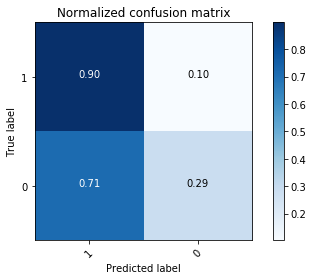

              precision    recall  f1-score   support

           1       0.87      0.93      0.90        43
           0       0.57      0.40      0.47        10

   micro avg       0.83      0.83      0.83        53
   macro avg       0.72      0.67      0.68        53
weighted avg       0.81      0.83      0.82        53

accuracy:  0.8301886792452831


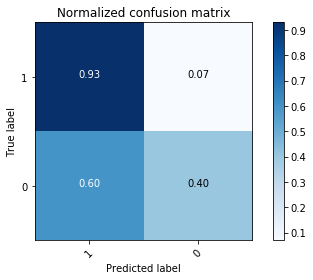

              precision    recall  f1-score   support

           1       0.89      0.81      0.85        42
           0       0.47      0.64      0.54        11

   micro avg       0.77      0.77      0.77        53
   macro avg       0.68      0.72      0.69        53
weighted avg       0.81      0.77      0.79        53

accuracy:  0.7735849056603774


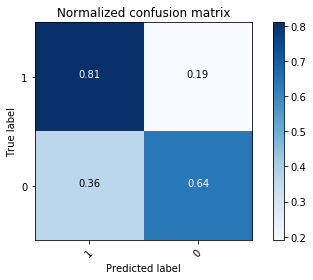

              precision    recall  f1-score   support

           1       0.93      0.90      0.92        42
           0       0.67      0.73      0.70        11

   micro avg       0.87      0.87      0.87        53
   macro avg       0.80      0.82      0.81        53
weighted avg       0.87      0.87      0.87        53

accuracy:  0.8679245283018868


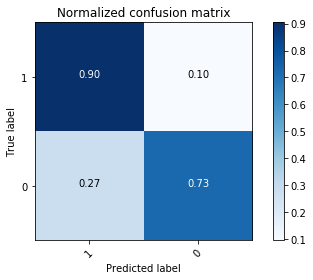

              precision    recall  f1-score   support

           1       0.91      0.91      0.91        43
           0       0.60      0.60      0.60        10

   micro avg       0.85      0.85      0.85        53
   macro avg       0.75      0.75      0.75        53
weighted avg       0.85      0.85      0.85        53

accuracy:  0.8490566037735849


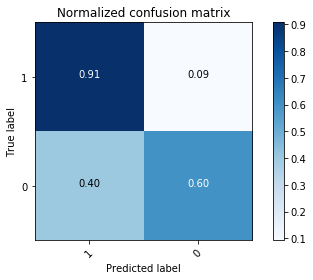

              precision    recall  f1-score   support

           1       0.93      0.84      0.88        45
           0       0.42      0.62      0.50         8

   micro avg       0.81      0.81      0.81        53
   macro avg       0.67      0.73      0.69        53
weighted avg       0.85      0.81      0.83        53

accuracy:  0.8113207547169812


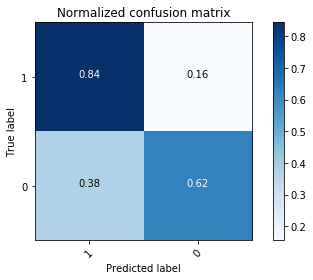

              precision    recall  f1-score   support

           1       0.87      0.85      0.86        40
           0       0.57      0.62      0.59        13

   micro avg       0.79      0.79      0.79        53
   macro avg       0.72      0.73      0.73        53
weighted avg       0.80      0.79      0.79        53

accuracy:  0.7924528301886793


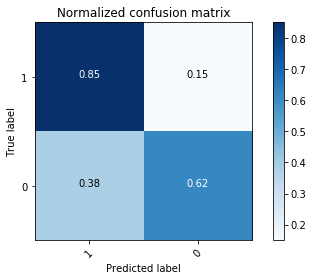

In [13]:
acc.append("Minkowski 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.88      0.98      0.92        43
           0       0.80      0.40      0.53        10

   micro avg       0.87      0.87      0.87        53
   macro avg       0.84      0.69      0.73        53
weighted avg       0.86      0.87      0.85        53

accuracy:  0.8679245283018868


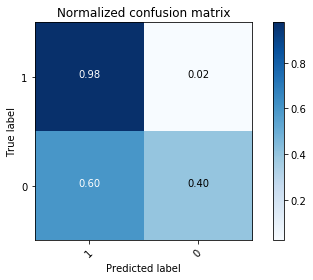

              precision    recall  f1-score   support

           1       0.89      0.95      0.92        42
           0       0.75      0.55      0.63        11

   micro avg       0.87      0.87      0.87        53
   macro avg       0.82      0.75      0.78        53
weighted avg       0.86      0.87      0.86        53

accuracy:  0.8679245283018868


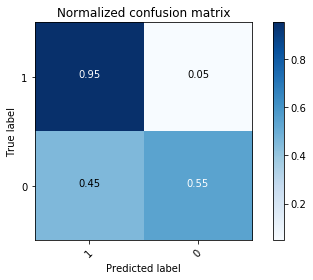

              precision    recall  f1-score   support

           1       0.91      0.93      0.92        45
           0       0.57      0.50      0.53         8

   micro avg       0.87      0.87      0.87        53
   macro avg       0.74      0.72      0.73        53
weighted avg       0.86      0.87      0.86        53

accuracy:  0.8679245283018868


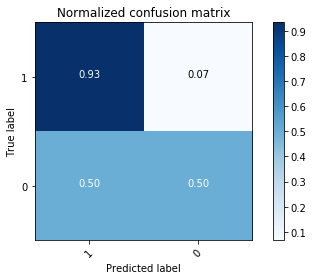

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        40
           0       1.00      0.38      0.56        13

   micro avg       0.85      0.85      0.85        53
   macro avg       0.92      0.69      0.73        53
weighted avg       0.87      0.85      0.82        53

accuracy:  0.8490566037735849


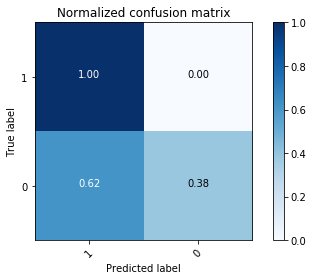

              precision    recall  f1-score   support

           1       0.87      0.98      0.92        42
           0       0.83      0.45      0.59        11

   micro avg       0.87      0.87      0.87        53
   macro avg       0.85      0.72      0.75        53
weighted avg       0.86      0.87      0.85        53

accuracy:  0.8679245283018868


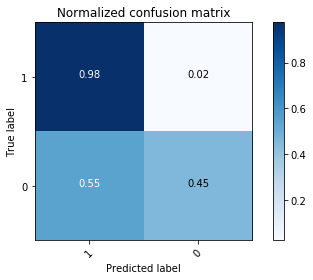

              precision    recall  f1-score   support

           1       0.91      0.98      0.94        43
           0       0.86      0.60      0.71        10

   micro avg       0.91      0.91      0.91        53
   macro avg       0.89      0.79      0.82        53
weighted avg       0.90      0.91      0.90        53

accuracy:  0.9056603773584906


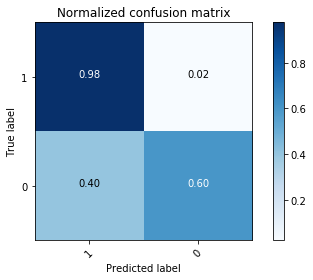

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        41
           0       1.00      0.08      0.15        12

   micro avg       0.79      0.79      0.79        53
   macro avg       0.89      0.54      0.52        53
weighted avg       0.84      0.79      0.72        53

accuracy:  0.7924528301886793


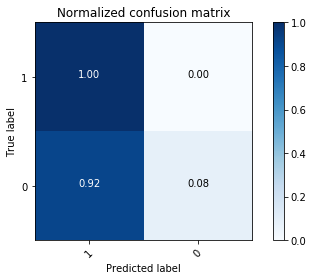

              precision    recall  f1-score   support

           1       0.86      0.98      0.91        44
           0       0.67      0.22      0.33         9

   micro avg       0.85      0.85      0.85        53
   macro avg       0.76      0.60      0.62        53
weighted avg       0.83      0.85      0.82        53

accuracy:  0.8490566037735849


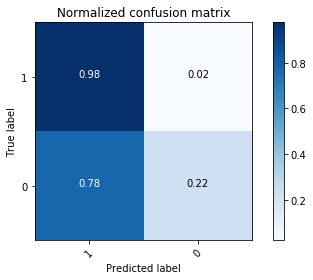

              precision    recall  f1-score   support

           1       0.85      0.98      0.91        42
           0       0.80      0.36      0.50        11

   micro avg       0.85      0.85      0.85        53
   macro avg       0.83      0.67      0.71        53
weighted avg       0.84      0.85      0.83        53

accuracy:  0.8490566037735849


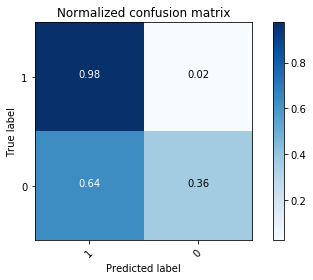

              precision    recall  f1-score   support

           1       0.91      0.95      0.93        43
           0       0.75      0.60      0.67        10

   micro avg       0.89      0.89      0.89        53
   macro avg       0.83      0.78      0.80        53
weighted avg       0.88      0.89      0.88        53

accuracy:  0.8867924528301887


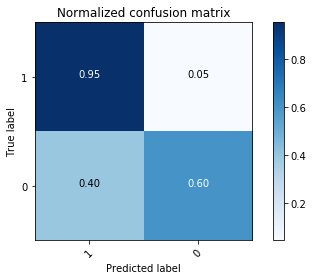

In [14]:
acc.append("Minkowski 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.84      1.00      0.91        41
           0       1.00      0.33      0.50        12

   micro avg       0.85      0.85      0.85        53
   macro avg       0.92      0.67      0.71        53
weighted avg       0.87      0.85      0.82        53

accuracy:  0.8490566037735849


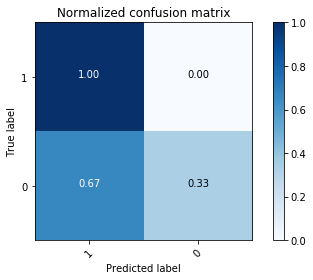

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


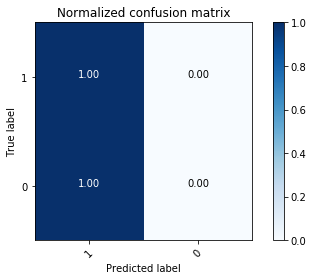

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        43
           0       1.00      0.50      0.67        10

   micro avg       0.91      0.91      0.91        53
   macro avg       0.95      0.75      0.81        53
weighted avg       0.92      0.91      0.89        53

accuracy:  0.9056603773584906


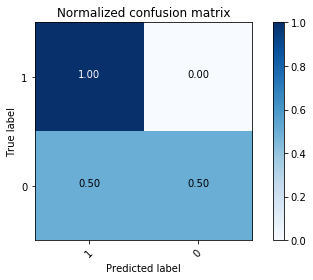

              precision    recall  f1-score   support

           1       0.84      1.00      0.91        42
           0       1.00      0.27      0.43        11

   micro avg       0.85      0.85      0.85        53
   macro avg       0.92      0.64      0.67        53
weighted avg       0.87      0.85      0.81        53

accuracy:  0.8490566037735849


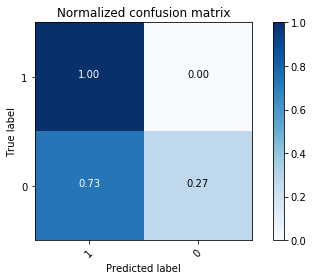

              precision    recall  f1-score   support

           1       0.88      1.00      0.94        45
           0       1.00      0.25      0.40         8

   micro avg       0.89      0.89      0.89        53
   macro avg       0.94      0.62      0.67        53
weighted avg       0.90      0.89      0.86        53

accuracy:  0.8867924528301887


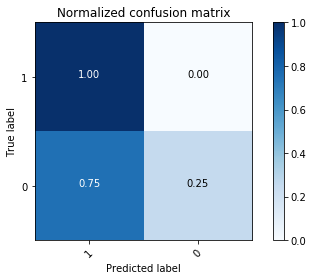

              precision    recall  f1-score   support

           1       0.83      0.95      0.88        40
           0       0.71      0.38      0.50        13

   micro avg       0.81      0.81      0.81        53
   macro avg       0.77      0.67      0.69        53
weighted avg       0.80      0.81      0.79        53

accuracy:  0.8113207547169812


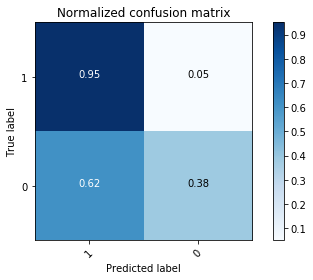

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


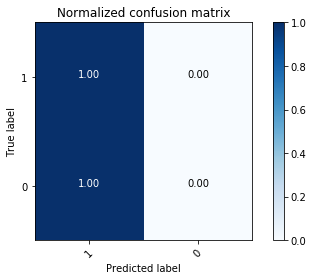

              precision    recall  f1-score   support

           1       0.88      0.98      0.92        43
           0       0.80      0.40      0.53        10

   micro avg       0.87      0.87      0.87        53
   macro avg       0.84      0.69      0.73        53
weighted avg       0.86      0.87      0.85        53

accuracy:  0.8679245283018868


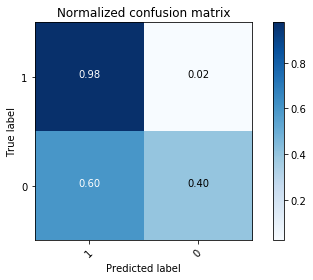

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        43
           0       1.00      0.50      0.67        10

   micro avg       0.91      0.91      0.91        53
   macro avg       0.95      0.75      0.81        53
weighted avg       0.92      0.91      0.89        53

accuracy:  0.9056603773584906


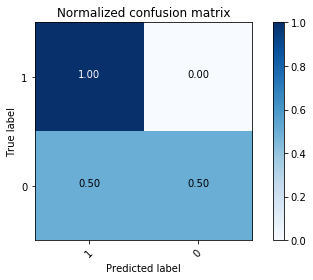

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


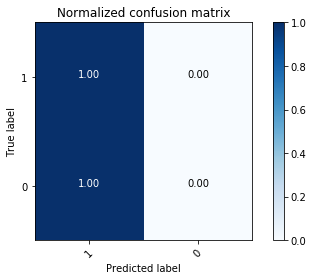

In [15]:
acc.append("Minkowski 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


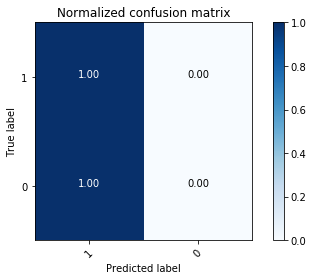

              precision    recall  f1-score   support

           1       0.79      0.98      0.87        42
           0       0.00      0.00      0.00        11

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.49      0.44        53
weighted avg       0.62      0.77      0.69        53

accuracy:  0.7735849056603774


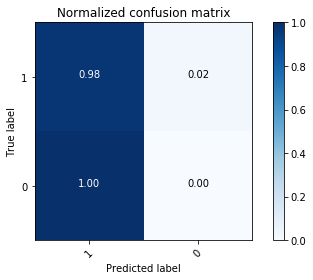

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


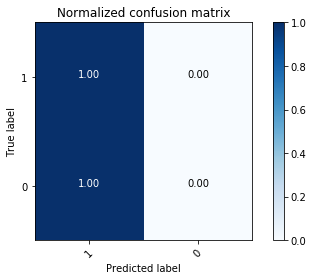

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.85      1.00      0.92        45
           0       0.00      0.00      0.00         8

   micro avg       0.85      0.85      0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53

accuracy:  0.8490566037735849


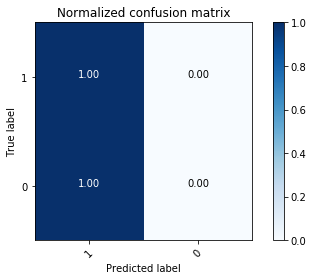

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


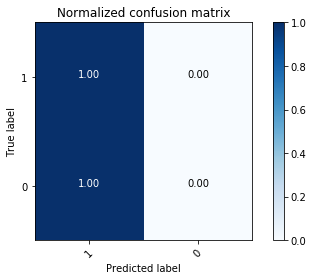

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


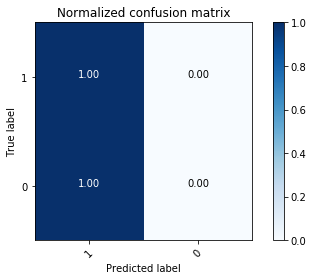

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        45
           0       1.00      0.12      0.22         8

   micro avg       0.87      0.87      0.87        53
   macro avg       0.93      0.56      0.58        53
weighted avg       0.89      0.87      0.82        53

accuracy:  0.8679245283018868


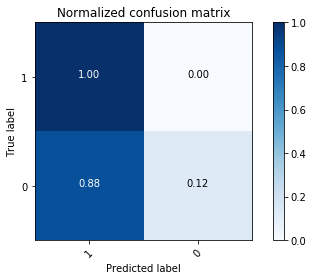

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


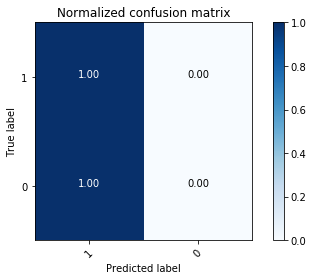

              precision    recall  f1-score   support

           1       0.86      0.95      0.90        44
           0       0.50      0.22      0.31         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.68      0.59      0.61        53
weighted avg       0.80      0.83      0.80        53

accuracy:  0.8301886792452831


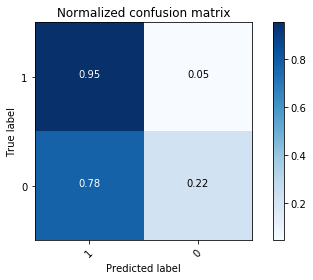

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


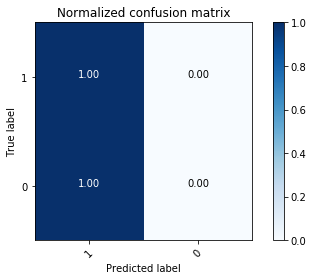

In [16]:
acc.append("Minkowski 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


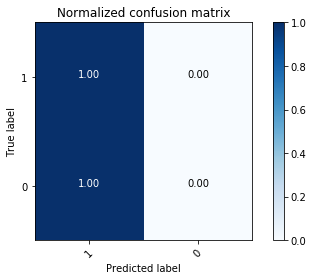

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


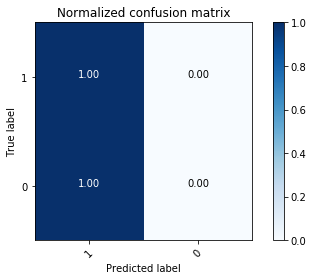

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.74      1.00      0.85        39
           0       0.00      0.00      0.00        14

   micro avg       0.74      0.74      0.74        53
   macro avg       0.37      0.50      0.42        53
weighted avg       0.54      0.74      0.62        53

accuracy:  0.7358490566037735


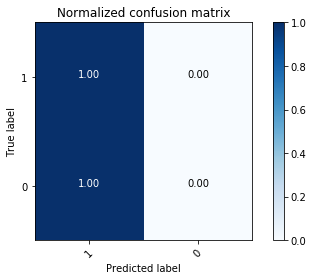

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.87      1.00      0.93        46
           0       0.00      0.00      0.00         7

   micro avg       0.87      0.87      0.87        53
   macro avg       0.43      0.50      0.46        53
weighted avg       0.75      0.87      0.81        53

accuracy:  0.8679245283018868


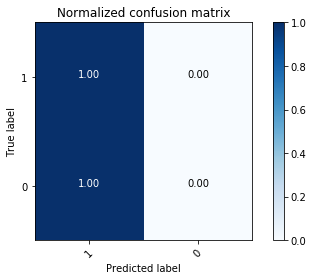

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.85      1.00      0.92        45
           0       0.00      0.00      0.00         8

   micro avg       0.85      0.85      0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53

accuracy:  0.8490566037735849


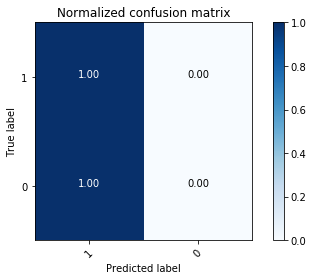

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


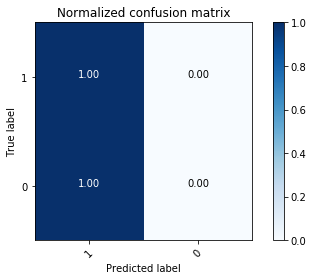

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


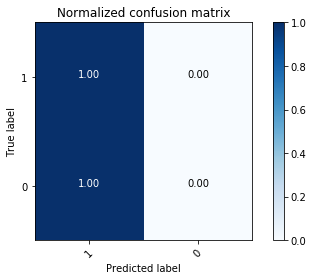

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


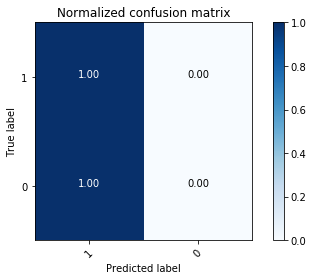

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


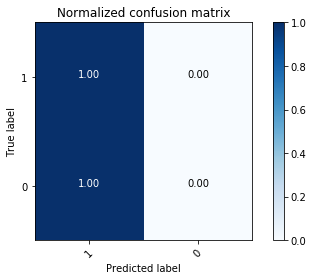

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


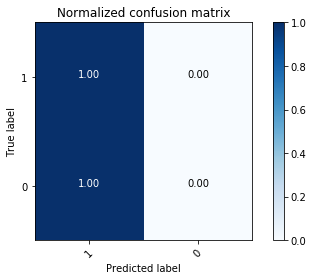

In [17]:
acc.append("Minkowski 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


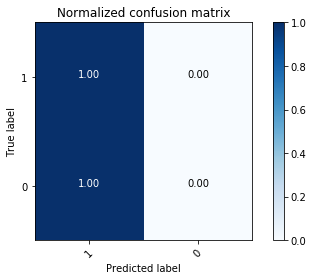

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


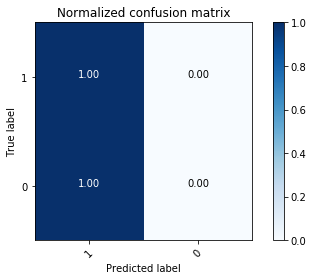

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


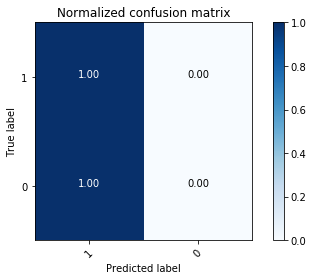

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


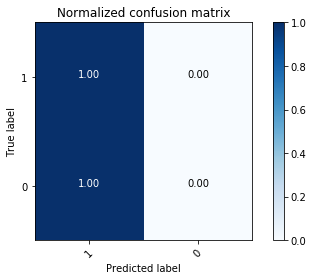

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


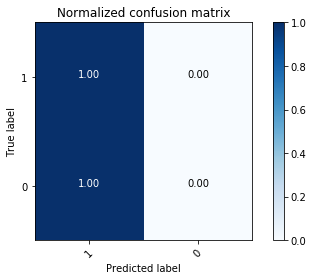

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


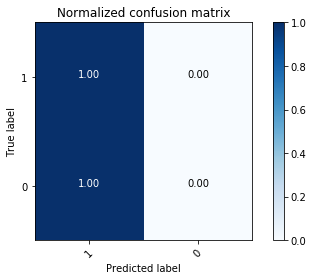

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


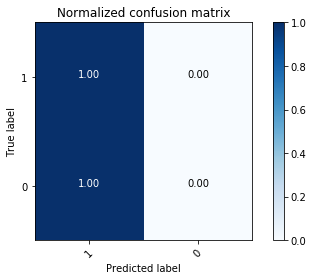

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


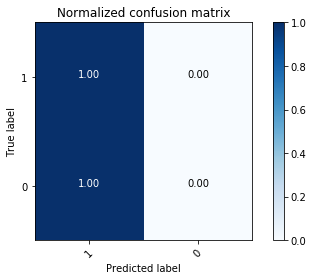

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.85      1.00      0.92        45
           0       0.00      0.00      0.00         8

   micro avg       0.85      0.85      0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53

accuracy:  0.8490566037735849


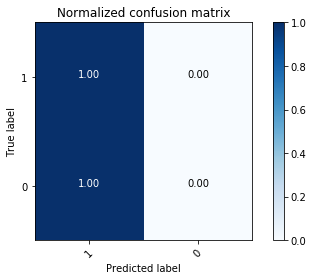

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


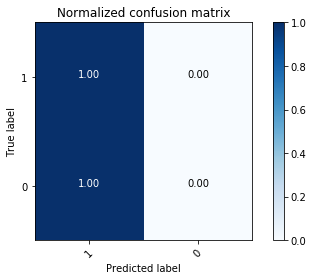

In [18]:
acc.append("Minkowski 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.85      1.00      0.92        45
           0       0.00      0.00      0.00         8

   micro avg       0.85      0.85      0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53

accuracy:  0.8490566037735849


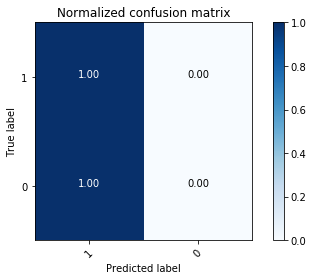

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


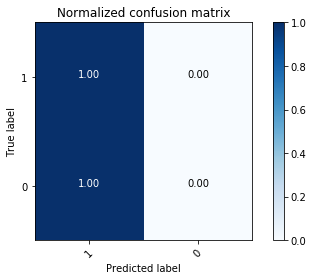

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.85      1.00      0.92        45
           0       0.00      0.00      0.00         8

   micro avg       0.85      0.85      0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53

accuracy:  0.8490566037735849


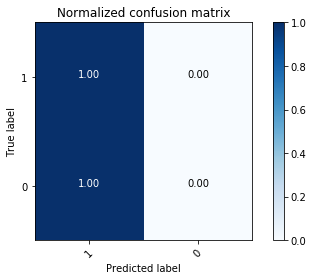

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


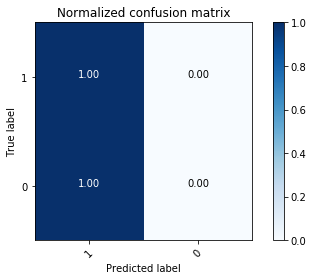

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


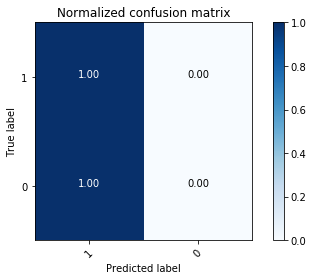

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


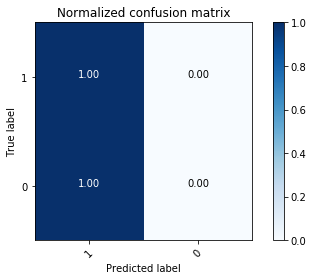

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.87      1.00      0.93        46
           0       0.00      0.00      0.00         7

   micro avg       0.87      0.87      0.87        53
   macro avg       0.43      0.50      0.46        53
weighted avg       0.75      0.87      0.81        53

accuracy:  0.8679245283018868


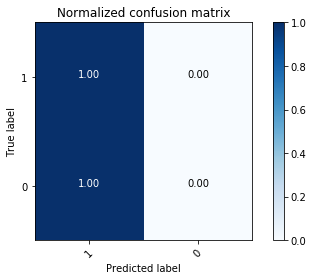

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.74      1.00      0.85        39
           0       0.00      0.00      0.00        14

   micro avg       0.74      0.74      0.74        53
   macro avg       0.37      0.50      0.42        53
weighted avg       0.54      0.74      0.62        53

accuracy:  0.7358490566037735


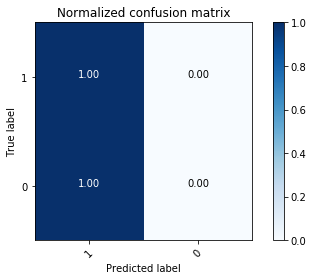

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.85      1.00      0.92        45
           0       0.00      0.00      0.00         8

   micro avg       0.85      0.85      0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53

accuracy:  0.8490566037735849


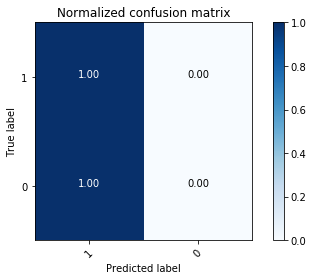

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


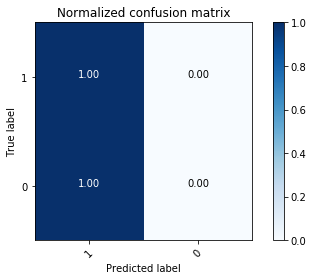

In [19]:
acc.append("Minkowski 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [20]:
with open("accAppendicitisKNNWith20Noise.csv", 'w') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)
    #writer.writerow(list_of_emails)